In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["image.cmap"] = "viridis"

In [3]:
df = pd.read_csv('data/mlbootcamp5_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


              mean
gender            
1       161.355612
2       169.947895

Men: 24470
Women: 45530


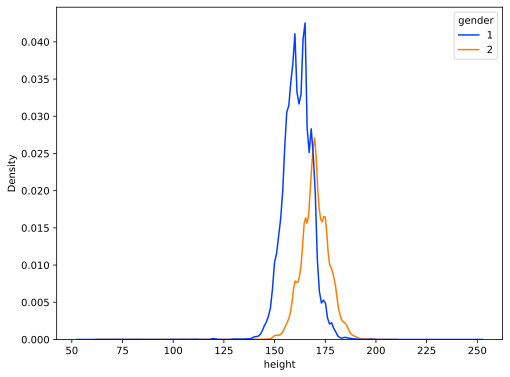

In [5]:
# Question 1.1. How many men and women are present in this dataset? 
# Values of the gender feature were not given (whether “1” stands for women or for men)– figure 
# this out by looking analyzing height, making the assumption that men are taller on average.

print(df.groupby('gender')['height'].agg([np.mean]))
# From this table, we can see that 2 - men, 1 - women
print(f"\nMen: {df[['gender']].value_counts()[2]}\nWomen: {df[['gender']].value_counts()[1]}")

sns.kdeplot(data=df, x='height', hue='gender', palette='bright')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

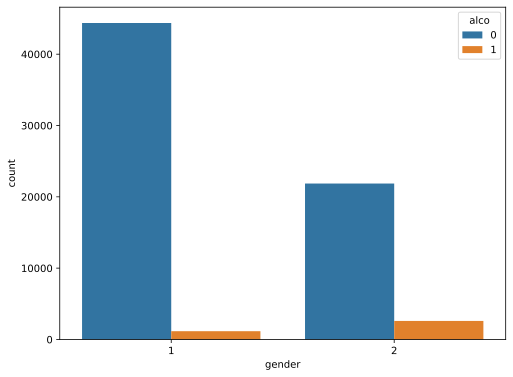

In [6]:
# Question 1.2. Who more often report consuming alcohol – men or women?

df.groupby('gender')['alco'].value_counts(normalize=True)

sns.countplot(x='gender', hue='alco', data=df)
# Answer: men

0.201


<Axes: xlabel='gender', ylabel='count'>

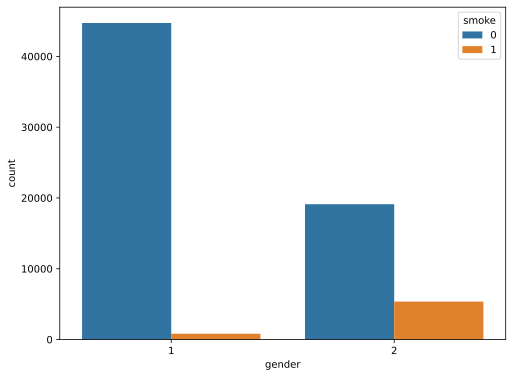

In [7]:
# Question 1.3. What’s the rounded difference between the percentages of smokers among men and women?

smoke_gender_df = df.groupby('gender')['smoke'].value_counts(normalize=True)
print(round(smoke_gender_df.iloc[3] - smoke_gender_df.iloc[1], 4))

sns.countplot(x='gender', hue='smoke', data=df)
# Answer: 20%

20


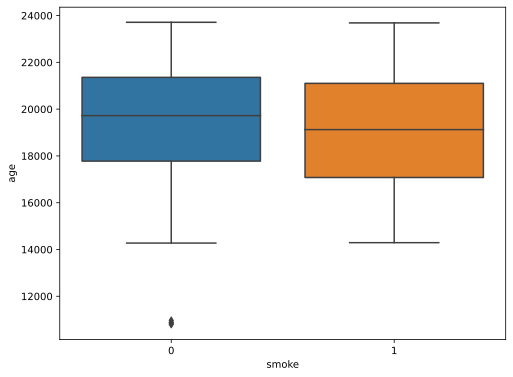

In [8]:
# Question 1.4. What’s the rounded difference between median values of age (in months) for non-smokers and smokers?
# You’ll need to figure out the units of feature age in this dataset.

print(round((df[df['smoke'] == 0]['age'].median() - df[df['smoke'] == 1]['age'].median())/30))

sns.boxplot(data=df, y='age', x='smoke')
plt.show()
# Answer: 20

In [9]:
# Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. 
# What’s the ratio of these two fractions?
df['age_years'] = round(df['age']/365.0)
print(df[(df.age_years < 65) & (df.age_years >= 60) & (df.ap_hi < 120) & (df.cholesterol == 1)\
         & (df.gender == 2) & (df.smoke == 1)]['cardio'].mean())
print(df[(df.age_years < 65) & (df.age_years >= 60) & (df.ap_hi >= 160) & (df.ap_hi <=180) \
         &(df.cholesterol == 3) & (df.gender == 2)]['cardio'].mean())
# Answer: 3

0.2564102564102564
0.860655737704918


In [10]:
# Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. 
# Normal BMI values are said to be from 18.5 to 25.

df['bmi'] = df.weight / (df.height/100)**2

# Question 1.6. (2 points). Choose the correct statements:
# 1. Median BMI in the sample is within boundaries of normal values.
# 2. Women’s BMI is on average higher then men’s.
# 3. Healthy people have higher median BMI than ill people.
# 4. In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment 
#    of healthy and non-drinking women

print(df['bmi'].median())
print(df.groupby('gender')['bmi'].mean())
print(df.groupby('cardio')['bmi'].median())
print(df[(df.cardio == 0) & (df.alco == 0) & (df.gender == 2)]['bmi'].mean())
print(df[(df.cardio == 0) & (df.alco == 0) & (df.gender == 1)]['bmi'].mean())

# Answer: 2, 4

26.374068120774975
gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64
cardio
0    25.476660
1    27.471384
Name: bmi, dtype: float64
25.87263807546017
26.845406594131507


In [11]:
# Filter out the following patient segments (we consider these as erroneous data)
# 1. diastolic pressure is higher than systolic
# 2. height is strictly less than 2.5 percentile
# 3. height is strictly more than 97.5 percentile
# 4. weight is strictly less than 2.5 percentile
# 5. weight is strictly more than 97.5 percentile

# Question 1.7. What percent of the original data (rounded) did we filter out in the previous step?

start_size = df.shape[0]
df = df[df.ap_lo <= df.ap_hi]
df = df[df.height >= df.height.quantile(0.025)]
df = df[df.height <= df.height.quantile(0.975)]
df = df[df.weight >= df.weight.quantile(0.025)]
df = df[df.weight <= df.weight.quantile(0.975)]
print(1 - df.shape[0]/start_size)

# Answer: 10

0.10308571428571434
